<a href="https://colab.research.google.com/github/JamesCraig35/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  James Craig

## Project Overview

# Load and Inspect Data

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = "/content/drive/MyDrive/Coding_dojo/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week01/Data/sales_predictions_2023.csv"
df_sales = pd.read_csv(df)
df_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 1) How many rows and columns?
12 columns
8522 rows

## 2) What are the datatypes of each variable?


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Clean Data

## 3) Are there duplicates? If so, drop any duplicates.
There are no duplicates.

In [ ]:
df_duplicated_rows = df_sales.duplicated()
df_sales.duplicated().sum()

0

## 4) Identify missing values
There are two colums with missing values:
Item_weight has 1463 missing values
and Outlet_size has 2410 missing values.

In [ ]:
df_sales.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
null_sums = df_sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5) Address the missing values by using a placeholder value.

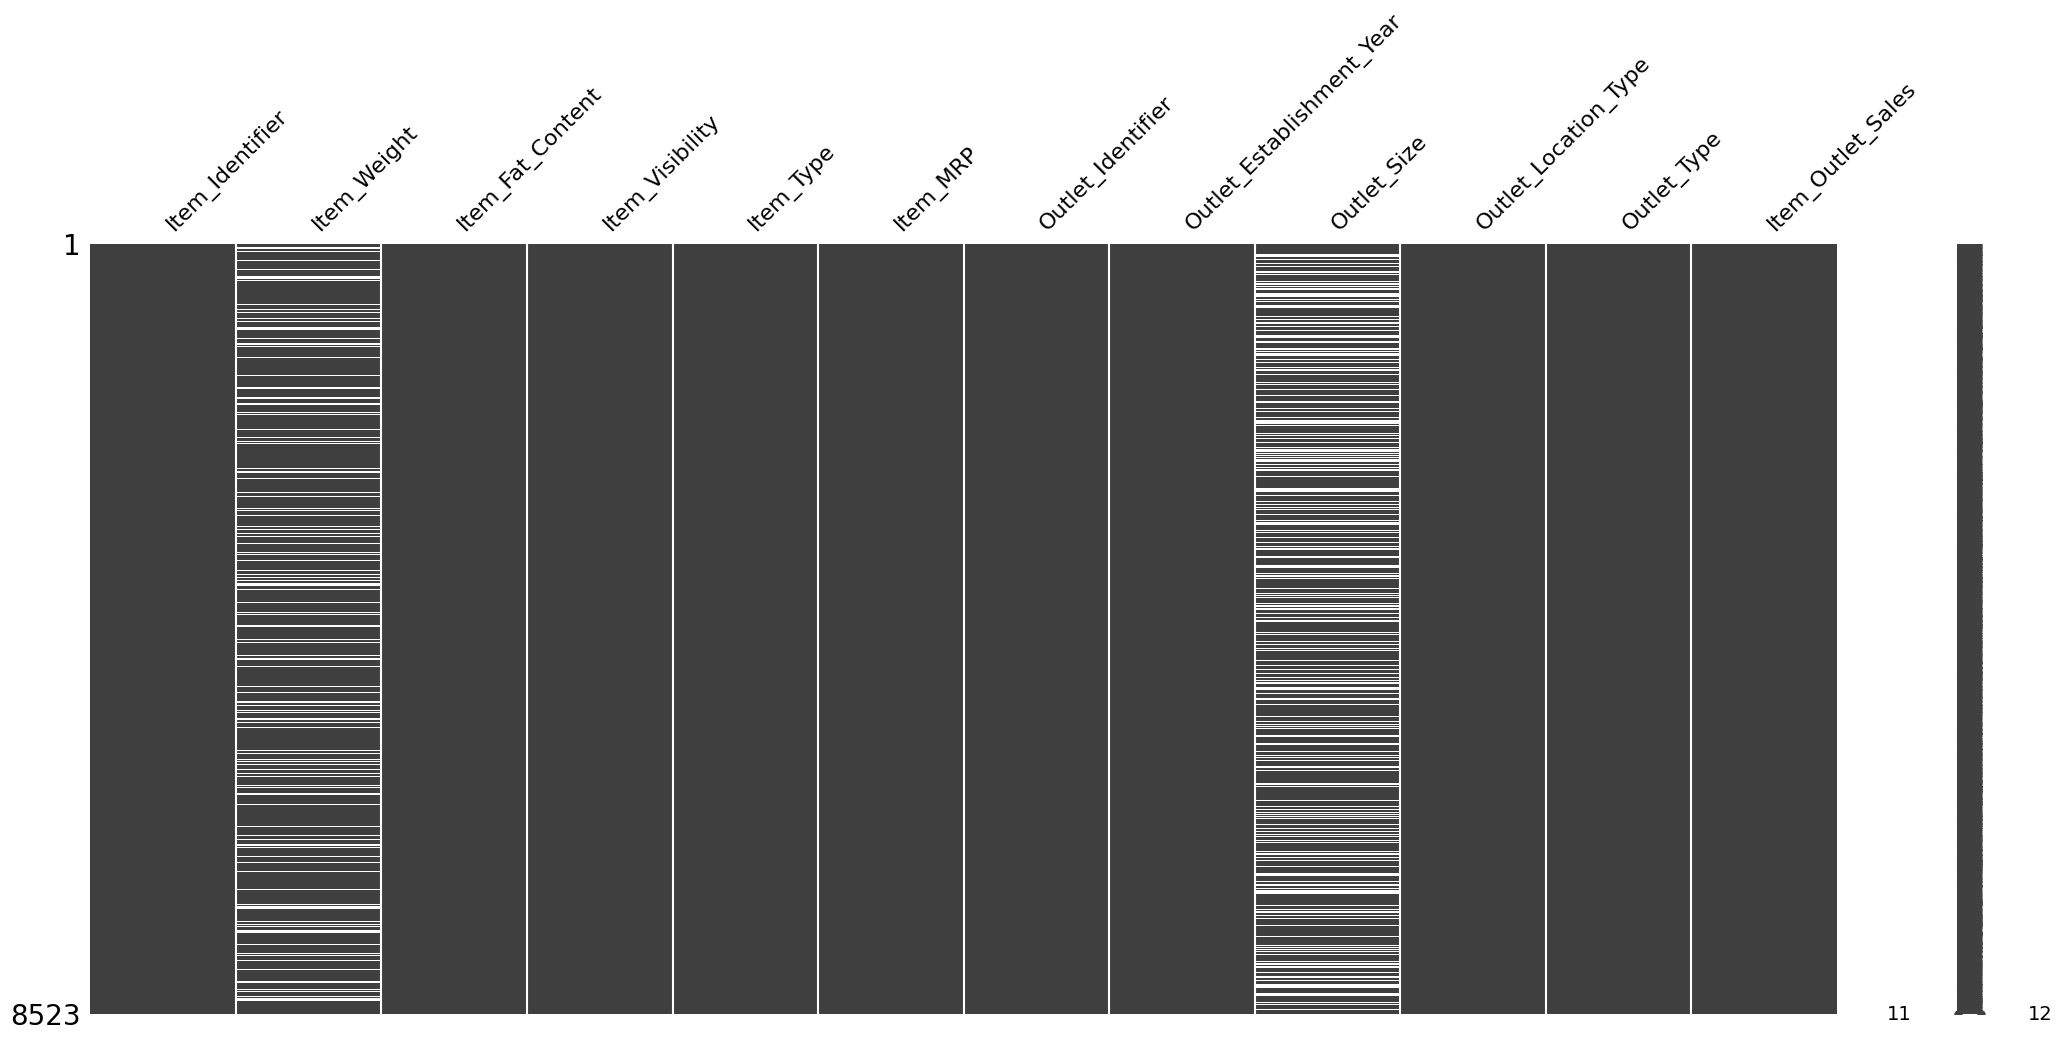

In [ ]:
import missingno as msno
msno.matrix(df_sales);
df_sales['Item_Weight'].fillna(-1, inplace=True)
df_sales['Outlet_Size'].fillna('Missing', inplace=True)

## 6) Confirm that there are no missing values after addressing them.


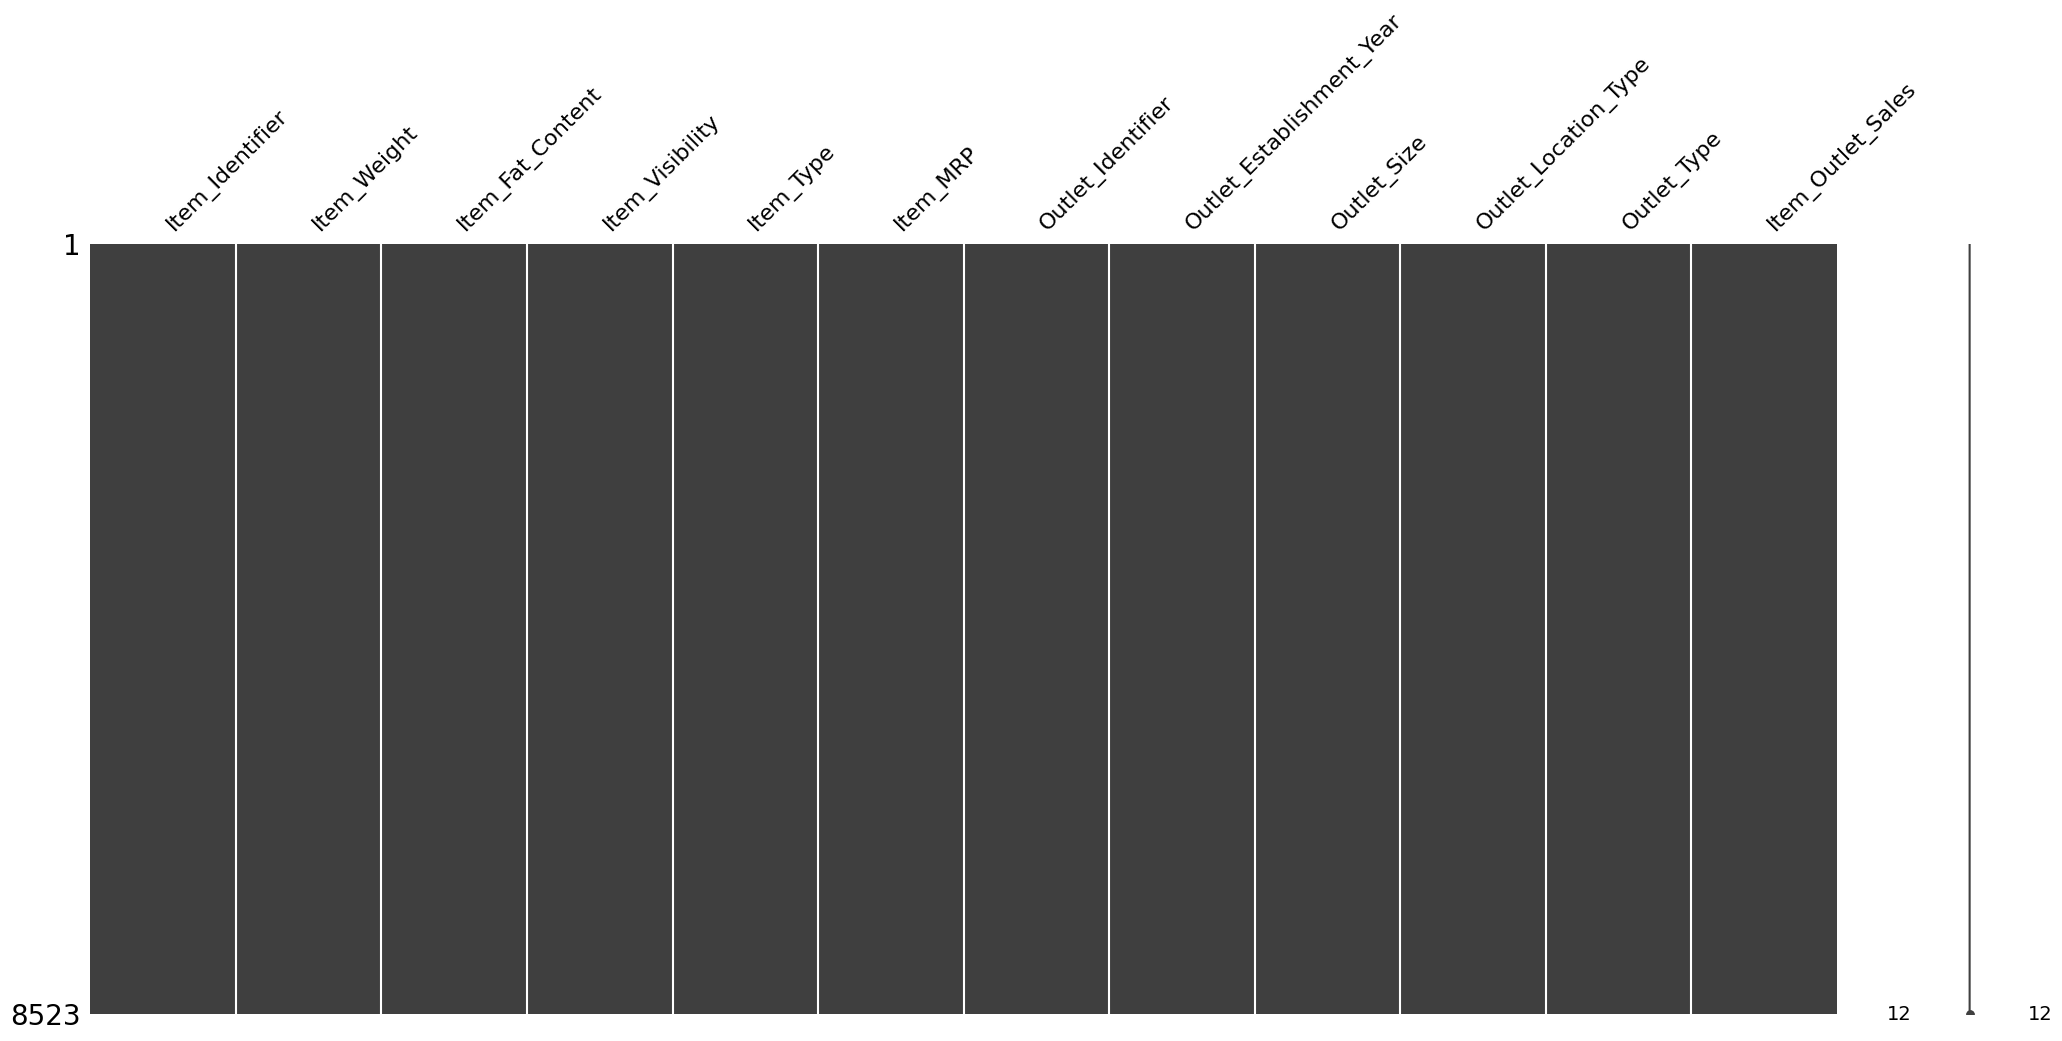

In [ ]:
# Recalculating Null_sums
null_sums = df_sales.isna().sum()
msno.matrix(df_sales);

In [ ]:
print(null_sums)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


## 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
from pandas.core.arrays.interval import value_counts
df_sales_object = df_sales.select_dtypes(include='object').columns
for object in df_sales_object:
  df_sales[object].value_counts()
  print(df_sales[object].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium     27

In [ ]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('LF','Low Fat')
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('High','Large')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace("low fat", "Low Fat")
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('Low fat','Low Fat')
df_sales_object = df_sales.select_dtypes(include='object').columns
for object in df_sales_object:
  df_sales[object].value_counts()
  print(df_sales[object].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium     2793
Missing    2410
Small      2388
Large       9

## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).


In [ ]:
import numpy as np
numerical_columns = df_sales.select_dtypes(include=[np.number]).columns
summary_statistics = df_sales[numerical_columns].describe()
summary_statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

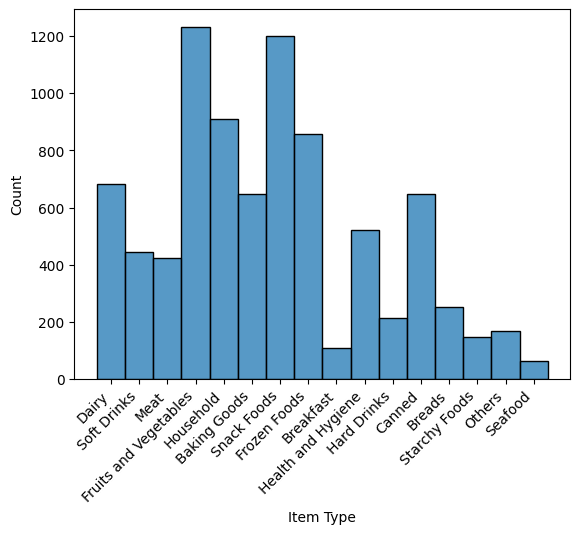

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df_sales, x='Item_Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Type')
plt.show()

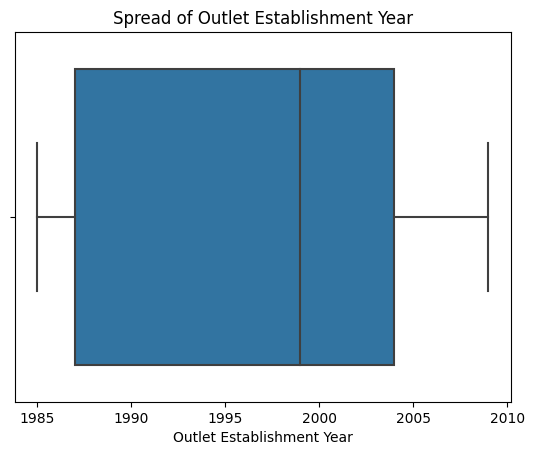

In [ ]:
sns.boxplot(data=df_sales, x='Outlet_Establishment_Year')
plt.title('Spread of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.show()

In [ ]:
df_sales_correlations = df_sales.corr()
print(df_sales_correlations)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.079371  0.022367   
Item_Visibility              -0.079371         1.000000 -0.001315   
Item_MRP                      0.022367        -0.001315  1.000000   
Outlet_Establishment_Year     0.537341        -0.074834  0.005020   
Item_Outlet_Sales            -0.055461        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                 0.537341          -0.055461  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000  


<ipython-input-47-79218e2fb9c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sales_correlations = df_sales.corr()


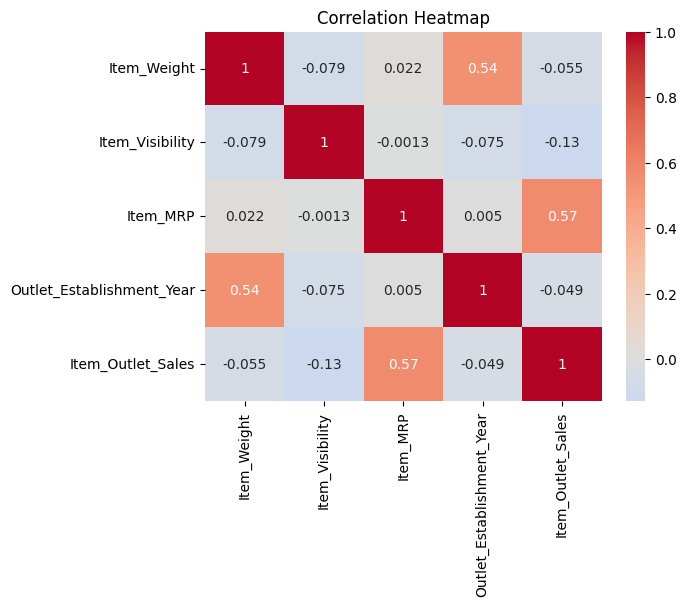

In [ ]:
sns.heatmap(df_sales_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Feature Inspection